In [1]:
from PyPurityTools import PyPurityTools as ppt
from PyPurityFunctions import PyPurityFunctions as ppf
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt
import scipy.fftpack
import os
import statistics
import h5py as h5

In [13]:
hf_target_first=h5.File("results_2023_02_02_14_38_waveform.hdf5","r")
#hf_target_last=h5.File("results_2023_01_31_last_waveform.hdf5","r")

In [14]:
filename_ch3_first=hf_target_first.get('filename_ch3').value
filename_ch4_first=hf_target_first.get('filename_ch4').value
filename_bkg_ch3_first=hf_target_first.get('filename_bkg_ch3').value
filename_bkg_ch4_first=hf_target_first.get('filename_bkg_ch4').value

In [15]:
average_ch3_first=np.array(hf_target_first.get('average_ch3').value)
average_0_100_ch3_first=np.array(hf_target_first.get('average_0_100_ch3').value)
average_900_1000_ch3_first=np.array(hf_target_first.get('average_900_1000_ch3').value)
waveform_ch3_time_first=np.array(hf_target_first.get('waveform_ch3_time').value)

average_ch4_first=np.array(hf_target_first.get('average_ch4').value)
average_0_100_ch4_first=np.array(hf_target_first.get('average_0_100_ch4').value)
average_900_1000_ch4_first=np.array(hf_target_first.get('average_900_1000_ch4').value)
waveform_ch4_time_first=np.array(hf_target_first.get('waveform_ch4_time').value)

average_bkg_ch3_first=np.array(hf_target_first.get('average_bkg_ch3').value)
average_bkg_0_100_ch3_first=np.array(hf_target_first.get('average_bkg_0_100_ch3').value)
average_bkg_900_1000_ch3_first=np.array(hf_target_first.get('average_bkg_900_1000_ch3').value)
bkg_time_ch3_first=np.array(hf_target_first.get('bkg_time_ch3').value)

average_bkg_ch4_first=np.array(hf_target_first.get('average_bkg_ch4').value)
average_bkg_0_100_ch4_first=np.array(hf_target_first.get('average_bkg_0_100_ch4').value)
average_bkg_900_1000_ch4_first=np.array(hf_target_first.get('average_bkg_900_1000_ch4').value)
bkg_time_ch4_first=np.array(hf_target_first.get('bkg_time_ch4').value)

In [16]:
print(filename_ch3_first)

Field_5.10.20Vcm_FibreIn_14.38.ch3.traces


In [6]:
average_ch3_last=np.array(hf_target_last.get('average_ch3').value)
average_0_100_ch3_last=np.array(hf_target_last.get('average_0_100_ch3').value)
average_900_1000_ch3_last=np.array(hf_target_last.get('average_900_1000_ch3').value)
waveform_ch3_time_last=np.array(hf_target_last.get('waveform_ch3_time').value)

average_ch4_last=np.array(hf_target_last.get('average_ch4').value)
average_0_100_ch4_last=np.array(hf_target_last.get('average_0_100_ch4').value)
average_900_1000_ch4_last=np.array(hf_target_last.get('average_900_1000_ch4').value)
waveform_ch4_time_last=np.array(hf_target_last.get('waveform_ch4_time').value)

average_bkg_ch3_last=np.array(hf_target_last.get('average_bkg_ch3').value)
average_bkg_0_100_ch3_last=np.array(hf_target_last.get('average_bkg_0_100_ch3').value)
average_bkg_900_1000_ch3_last=np.array(hf_target_last.get('average_bkg_900_1000_ch3').value)
bkg_time_ch3_last=np.array(hf_target_last.get('bkg_time_ch3').value)

average_bkg_ch4_last=np.array(hf_target_last.get('average_bkg_ch4').value)
average_bkg_0_100_ch4_last=np.array(hf_target_last.get('average_bkg_0_100_ch4').value)
average_bkg_900_1000_ch4_last=np.array(hf_target_last.get('average_bkg_900_1000_ch4').value)
bkg_time_ch4_last=np.array(hf_target_last.get('bkg_time_ch4').value)

NameError: name 'hf_target_last' is not defined

In [8]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [15.0, 10.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

In [ ]:
##################################

In [9]:
path_file: str = r"/unix/dune/purity/2022October14Vacuum/Gold/"
file= "Field_5.10.20Vcm_FibreIn_07.01.ch3.traces"
wavelist, timeList = ppt.getScopeWaveforms(path_file+file)

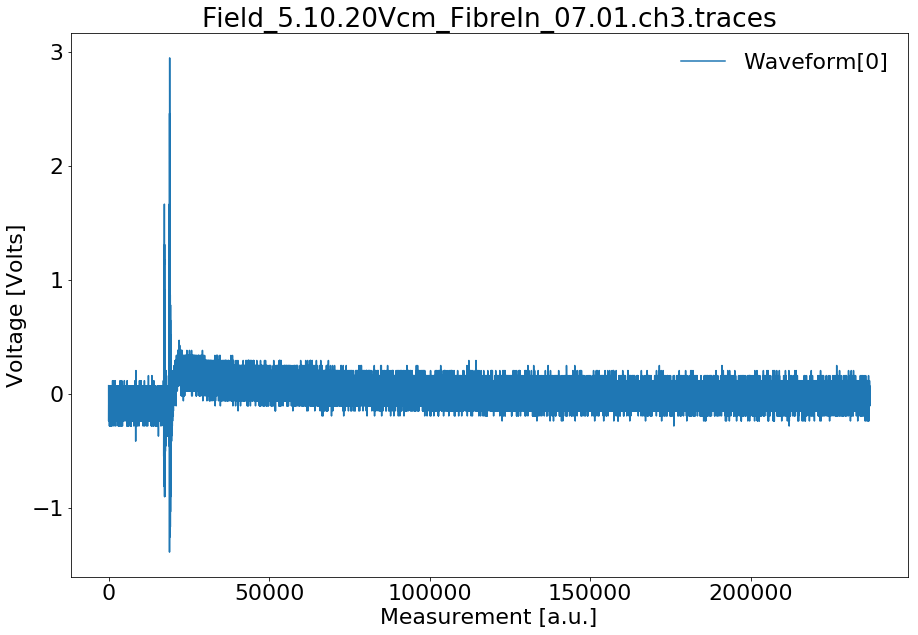

In [17]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time_first,wavelist[0],label="Waveform[0]")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(file)
ax.legend()

In [ ]:
####################

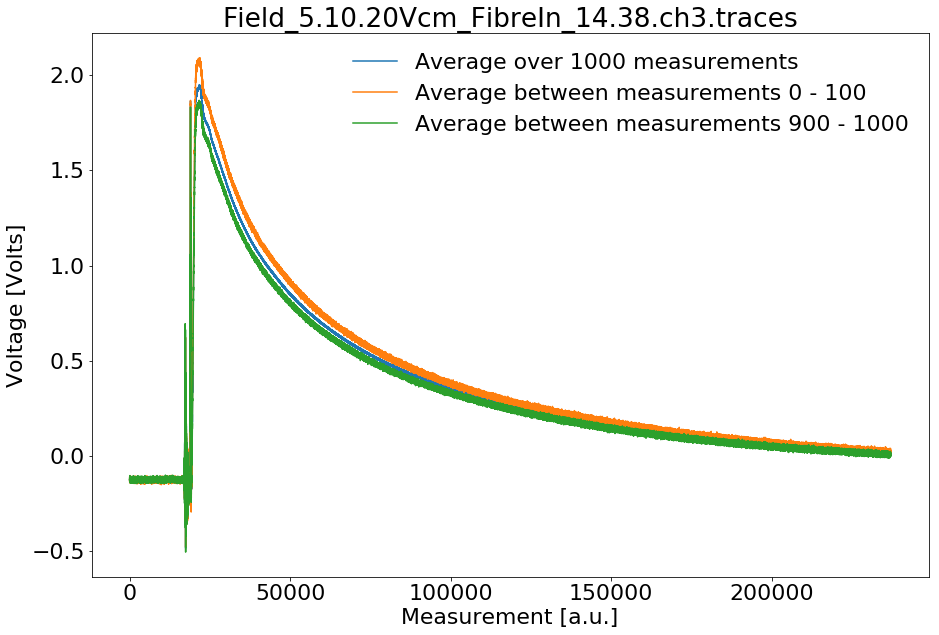

In [18]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time_first,average_ch3_first,label="Average over 1000 measurements")
ax.plot(waveform_ch3_time_first,average_0_100_ch3_first,label="Average between measurements 0 - 100")
ax.plot(waveform_ch3_time_first,average_900_1000_ch3_first,label="Average between measurements 900 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch3_first)
ax.legend()

In [ ]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time_last,average_ch3_first,label="Average over 1000 measurements")
ax.plot(waveform_ch3_time_last,average_0_100_ch3_first,label="Average between measurements 0 - 100")
ax.plot(waveform_ch3_time_last,average_900_1000_ch3_first,label="Average between measurements 900 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Channel 3 ANODE "+name_last)
ax.legend()

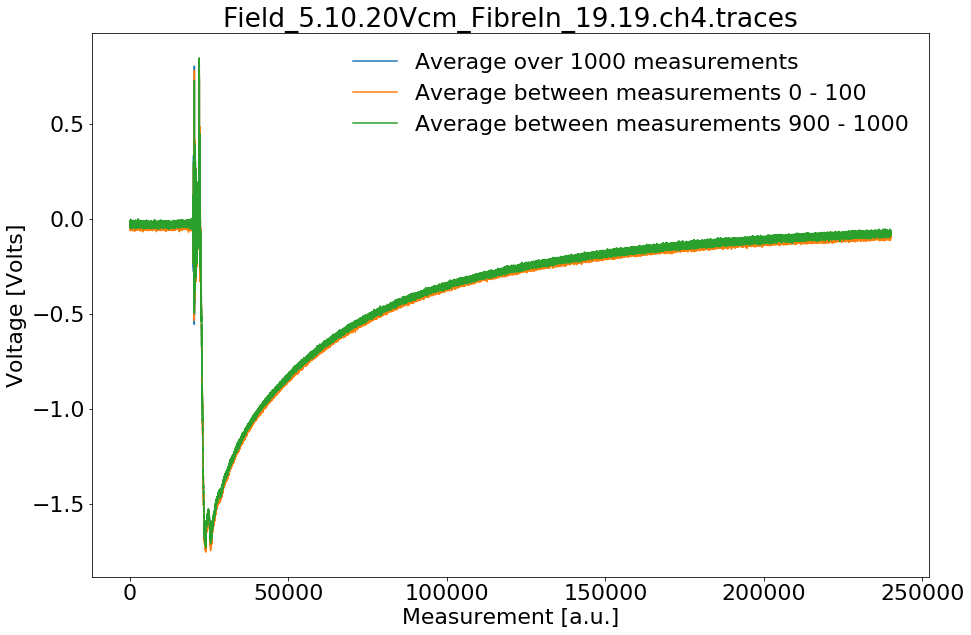

In [30]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time_first,average_ch4_first,label="Average over 1000 measurements")
ax.plot(waveform_ch4_time_first,average_0_100_ch4_first,label="Average between measurements 0 - 100")
ax.plot(waveform_ch4_time_first,average_900_1000_ch4_first,label="Average between measurements 900 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch4_first)
ax.legend()

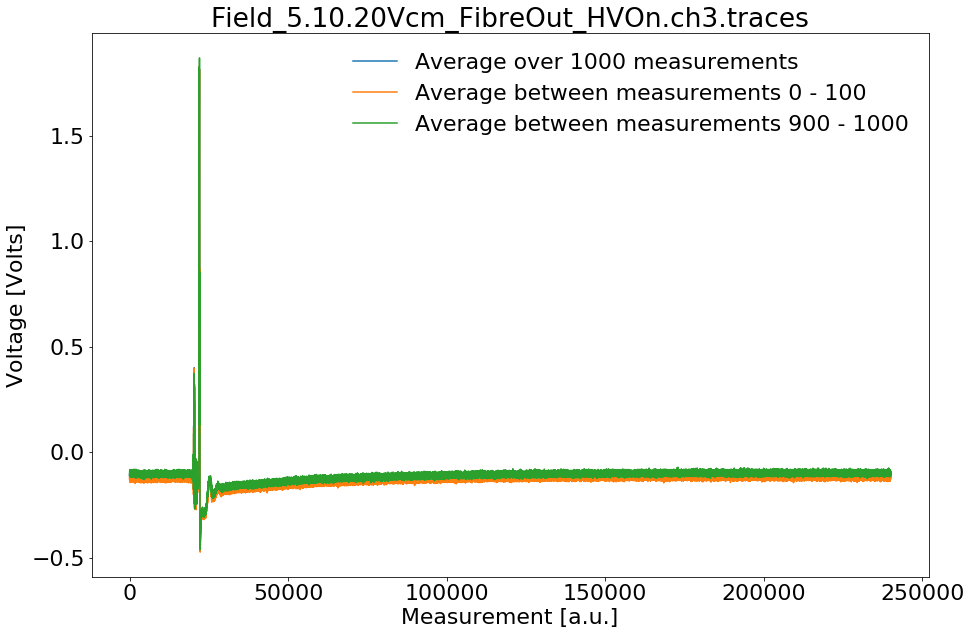

In [31]:
fig, ax = plt.subplots()
ax.plot(bkg_time_ch3_first,average_bkg_ch3_first,label="Average over 1000 measurements")
ax.plot(bkg_time_ch3_first,average_bkg_0_100_ch3_first,label="Average between measurements 0 - 100")
ax.plot(bkg_time_ch3_first,average_bkg_900_1000_ch3_first,label="Average between measurements 900 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_bkg_ch3_first)
ax.legend()

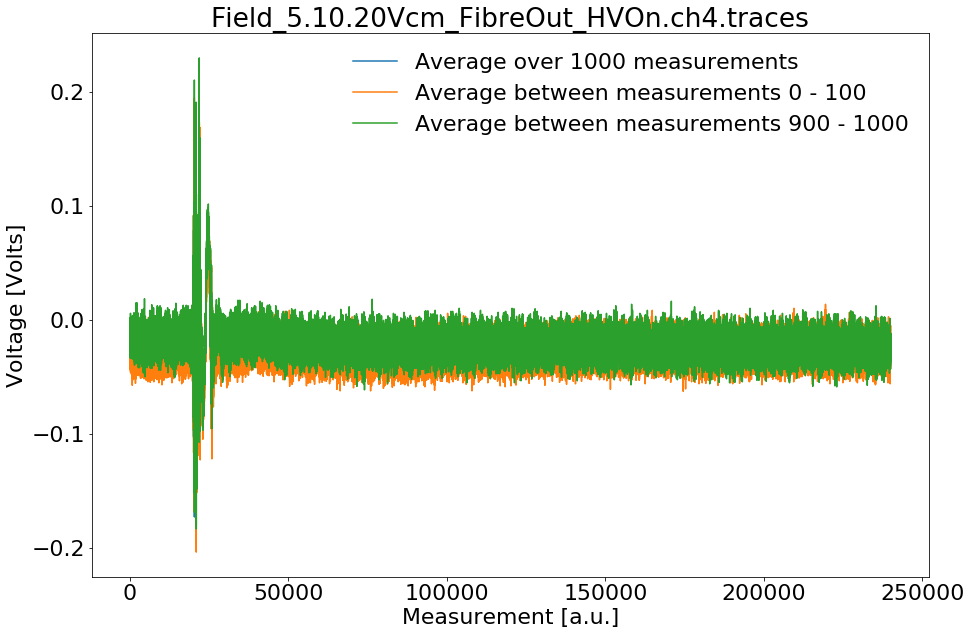

In [32]:
fig, ax = plt.subplots()
ax.plot(bkg_time_ch4_first,average_bkg_ch4_first,label="Average over 1000 measurements")
ax.plot(bkg_time_ch4_first,average_bkg_0_100_ch4_first,label="Average between measurements 0 - 100")
ax.plot(bkg_time_ch4_first,average_bkg_900_1000_ch4_first,label="Average between measurements 900 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_bkg_ch4_first)
ax.legend()

In [19]:
smoothed_ch3_ave=ppf.smoothed_average(average_ch3_first,10)
smoothed_ch4_ave=ppf.smoothed_average(average_ch4_first,10)
smoothed_ch3_bkg_ave=ppf.smoothed_average(average_bkg_ch3_first,10)
smoothed_ch4_bkg_ave=ppf.smoothed_average(average_bkg_ch4_first,10)
smoothed_ch3_time=np.arange(len(smoothed_ch3_ave))
smoothed_ch4_time=np.arange(len(smoothed_ch4_ave))
smoothed_ch3_bkg_time=np.arange(len(smoothed_ch3_bkg_ave))
smoothed_ch4_bkg_time=np.arange(len(smoothed_ch4_bkg_ave))

In [20]:
smoothed_ch3_ave_100=ppf.smoothed_average(average_ch3_first,100)
smoothed_ch4_ave_100=ppf.smoothed_average(average_ch4_first,100)
smoothed_ch3_bkg_ave_100=ppf.smoothed_average(average_bkg_ch3_first,100)
smoothed_ch4_bkg_ave_100=ppf.smoothed_average(average_bkg_ch4_first,100)
smoothed_ch3_time_100=np.arange(len(smoothed_ch3_ave_100))
smoothed_ch4_time_100=np.arange(len(smoothed_ch4_ave_100))
smoothed_ch3_bkg_time_100=np.arange(len(smoothed_ch3_bkg_ave_100))
smoothed_ch4_bkg_time_100=np.arange(len(smoothed_ch4_bkg_ave_100))

In [21]:
smoothed_ch3_ave_50=ppf.smoothed_average(average_ch3_first,50)
smoothed_ch4_ave_50=ppf.smoothed_average(average_ch4_first,50)
smoothed_ch3_bkg_ave_50=ppf.smoothed_average(average_bkg_ch3_first,50)
smoothed_ch4_bkg_ave_50=ppf.smoothed_average(average_bkg_ch4_first,50)
smoothed_ch3_time_50=np.arange(len(smoothed_ch3_ave_50))
smoothed_ch4_time_50=np.arange(len(smoothed_ch4_ave_50))
smoothed_ch3_bkg_time_50=np.arange(len(smoothed_ch3_bkg_ave_50))
smoothed_ch4_bkg_time_50=np.arange(len(smoothed_ch4_bkg_ave_50))

In [22]:
smoothed_ch3_same_plot_50=np.arange(0,23705,5)
smoothed_ch3_same_plot_100=np.arange(0,23710,10)
smoothed_ch4_same_plot_50=np.arange(0,24005,5)
smoothed_ch4_same_plot_100=np.arange(0,24010,10)

In [23]:
len(smoothed_ch4_bkg_ave_50)*5

24005

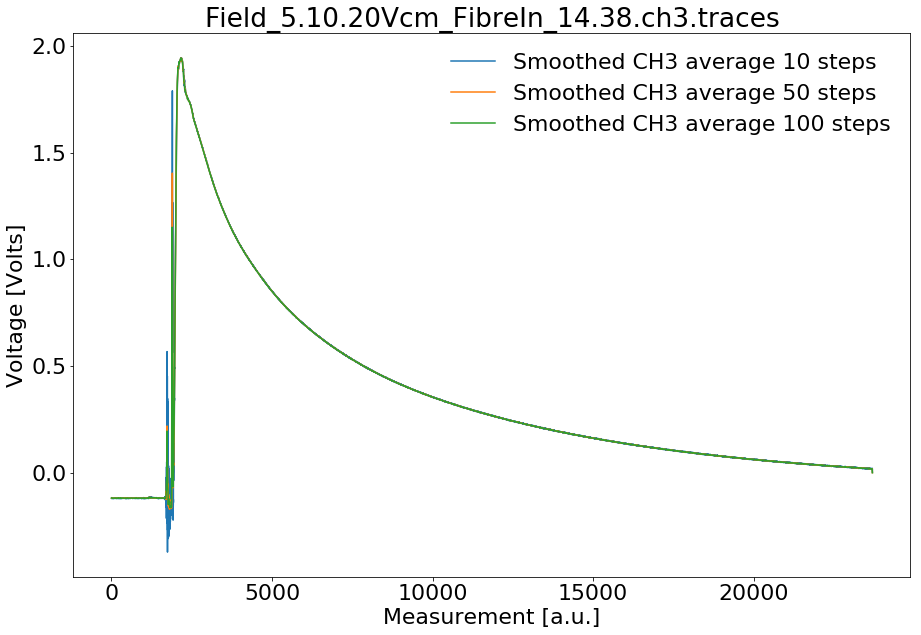

In [53]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,smoothed_ch3_ave,label="Smoothed CH3 average 10 steps")
ax.plot(smoothed_ch3_same_plot_50,smoothed_ch3_ave_50,label="Smoothed CH3 average 50 steps")
ax.plot(smoothed_ch3_same_plot_100,smoothed_ch3_ave_100,label="Smoothed CH3 average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch3_first)
ax.legend()

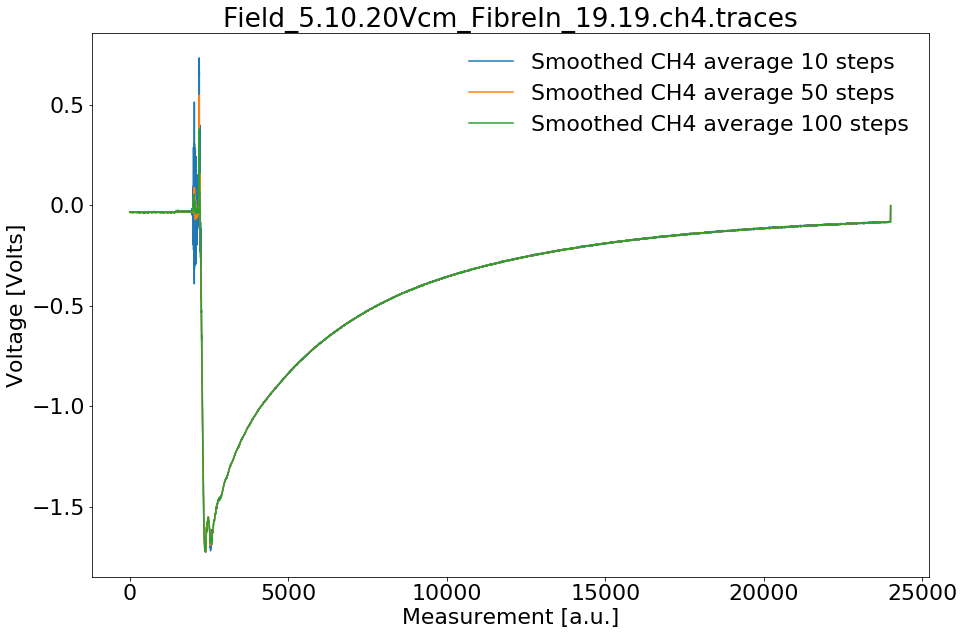

In [38]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,smoothed_ch4_ave,label="Smoothed CH4 average 10 steps")
ax.plot(smoothed_ch4_same_plot_50,smoothed_ch4_ave_50,label="Smoothed CH4 average 50 steps")
ax.plot(smoothed_ch4_same_plot_100,smoothed_ch4_ave_100,label="Smoothed CH4 average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch4_first)
ax.legend()

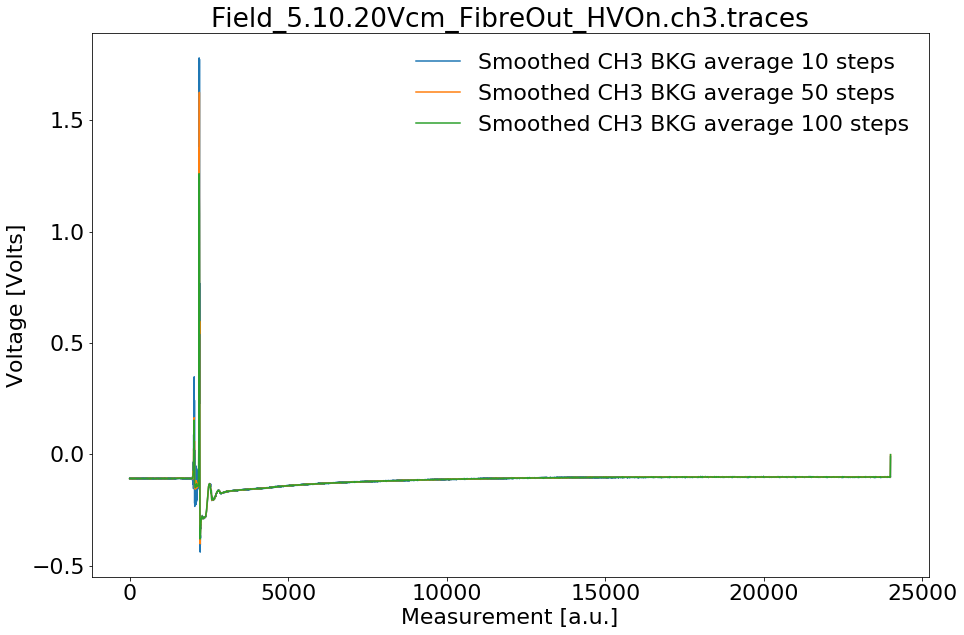

In [18]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_bkg_time,smoothed_ch3_bkg_ave,label="Smoothed CH3 BKG average 10 steps")
ax.plot(smoothed_ch4_same_plot_50,smoothed_ch3_bkg_ave_50,label="Smoothed CH3 BKG average 50 steps")
ax.plot(smoothed_ch4_same_plot_100,smoothed_ch3_bkg_ave_100,label="Smoothed CH3 BKG average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_bkg_ch3_first)
ax.legend()

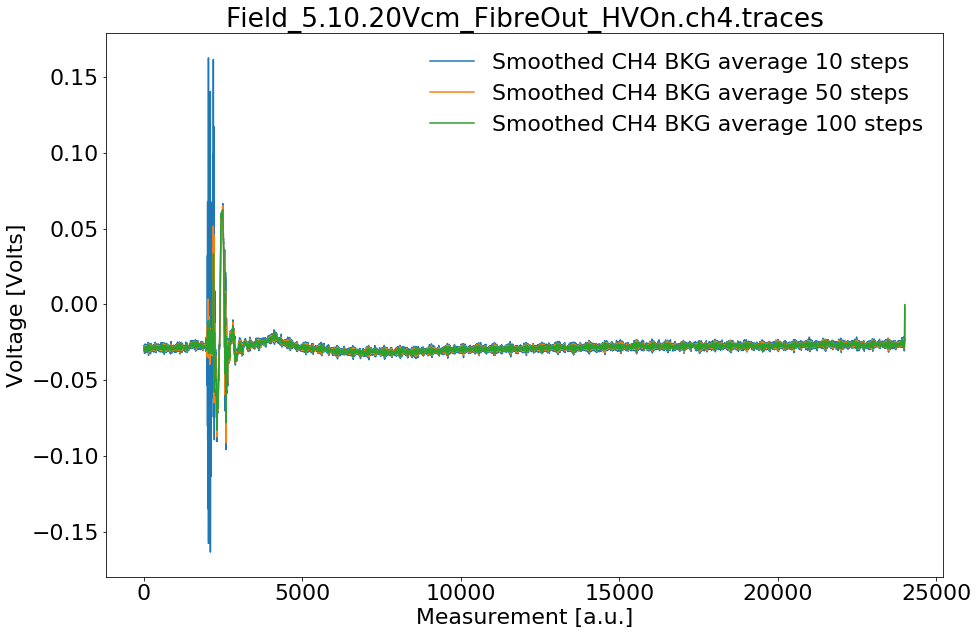

In [19]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_bkg_time,smoothed_ch4_bkg_ave,label="Smoothed CH4 BKG average 10 steps")
ax.plot(smoothed_ch4_same_plot_50,smoothed_ch4_bkg_ave_50,label="Smoothed CH4 BKG average 50 steps")
ax.plot(smoothed_ch4_same_plot_100,smoothed_ch4_bkg_ave_100,label="Smoothed CH4 BKG average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_bkg_ch4_first)
ax.legend()

In [24]:
####cleaning before smoothing

ave_clean_ch3=[]
for i in range(len(average_ch3_first)):
    ave_clean_ch3.append(average_ch3_first[i]-average_bkg_ch3_first[i])
    
ave_clean_ch4=[]
for i in range(len(average_ch4_first)):
    ave_clean_ch4.append(average_ch4_first[i]-average_bkg_ch4_first[i])
    
###cleaning after smoothing

ave_clean_ch3_smooth=[]
for i in range(len(smoothed_ch3_ave)):
    ave_clean_ch3_smooth.append(smoothed_ch3_ave[i]-smoothed_ch3_bkg_ave[i])
    
ave_clean_ch4_smooth=[]
for i in range(len(smoothed_ch4_ave)):
    ave_clean_ch4_smooth.append(smoothed_ch4_ave[i]-smoothed_ch4_bkg_ave[i])

ave_clean_ch3_smooth_50=[]
for i in range(len(smoothed_ch3_ave_50)):
    ave_clean_ch3_smooth_50.append(smoothed_ch3_ave_50[i]-smoothed_ch3_bkg_ave_50[i])
    
ave_clean_ch4_smooth_50=[]
for i in range(len(smoothed_ch4_ave_50)):
    ave_clean_ch4_smooth_50.append(smoothed_ch4_ave_50[i]-smoothed_ch4_bkg_ave_50[i])
    
ave_clean_ch3_smooth_100=[]
for i in range(len(smoothed_ch3_ave_100)):
    ave_clean_ch3_smooth_100.append(smoothed_ch3_ave_100[i]-smoothed_ch3_bkg_ave_100[i])
    
ave_clean_ch4_smooth_100=[]
for i in range(len(smoothed_ch4_ave_100)):
    ave_clean_ch4_smooth_100.append(smoothed_ch4_ave_100[i]-smoothed_ch4_bkg_ave_100[i])

In [25]:
ave_clean_ch3_post_smooth=ppf.smoothed_average(ave_clean_ch3,10)
ave_clean_ch3_post_smooth_50=ppf.smoothed_average(ave_clean_ch3,50)
ave_clean_ch3_post_smooth_100=ppf.smoothed_average(ave_clean_ch3,100)
ave_clean_ch4_post_smooth=ppf.smoothed_average(ave_clean_ch4,10)
ave_clean_ch4_post_smooth_50=ppf.smoothed_average(ave_clean_ch4,50)
ave_clean_ch4_post_smooth_100=ppf.smoothed_average(ave_clean_ch4,100)

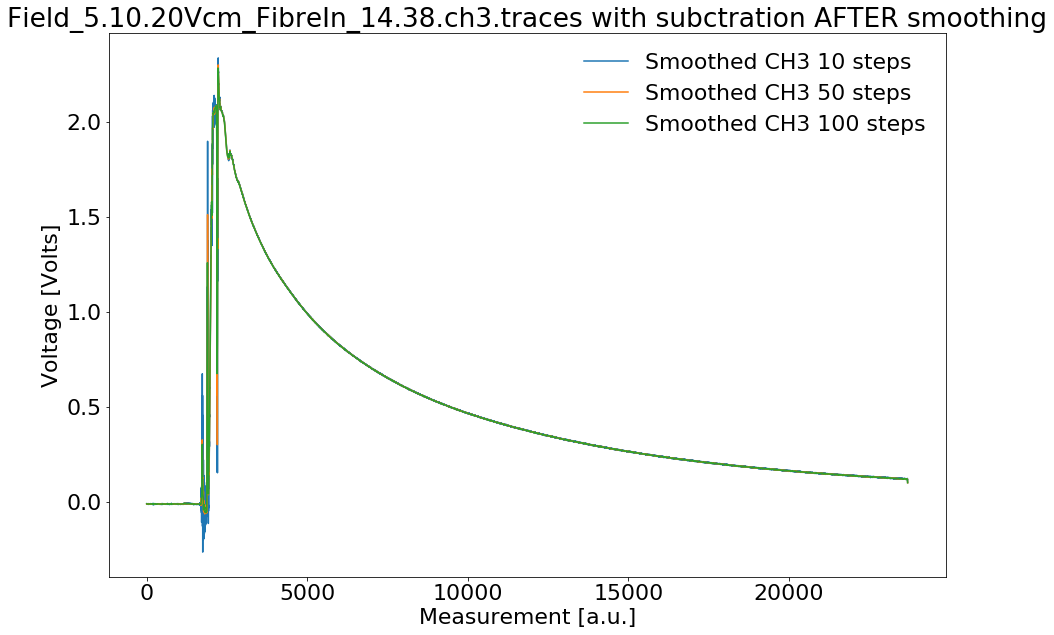

In [29]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,ave_clean_ch3_smooth,label="Smoothed CH3 10 steps")
ax.plot(smoothed_ch3_same_plot_50,ave_clean_ch3_smooth_50,label="Smoothed CH3 50 steps")
ax.plot(smoothed_ch3_same_plot_100,ave_clean_ch3_smooth_100,label="Smoothed CH3 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch3_first+" with subctration AFTER smoothing")
ax.legend()

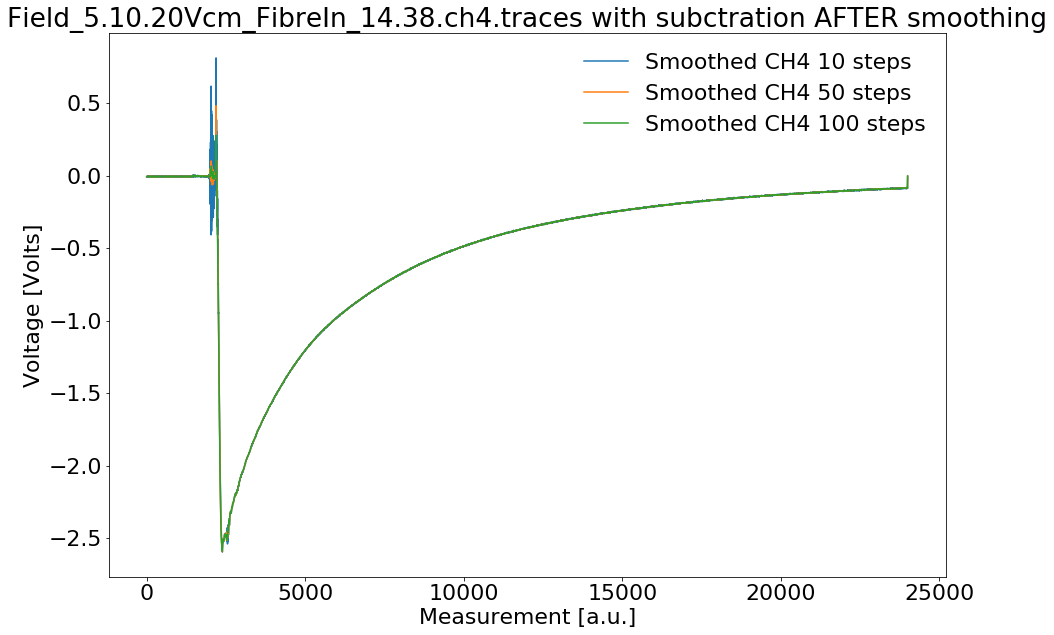

In [30]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,ave_clean_ch4_smooth,label="Smoothed CH4 10 steps")
ax.plot(smoothed_ch4_same_plot_50,ave_clean_ch4_smooth_50,label="Smoothed CH4 50 steps")
ax.plot(smoothed_ch4_same_plot_100,ave_clean_ch4_smooth_100,label="Smoothed CH4 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch4_first+" with subctration AFTER smoothing")
ax.legend()

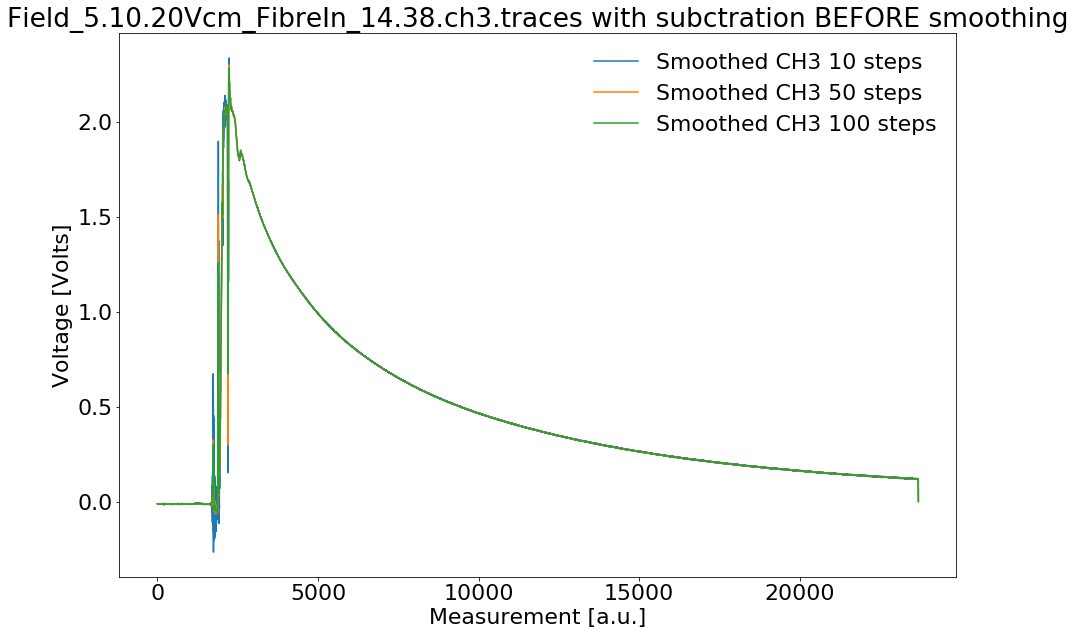

In [31]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,ave_clean_ch3_post_smooth,label="Smoothed CH3 10 steps")
ax.plot(smoothed_ch3_same_plot_50,ave_clean_ch3_post_smooth_50,label="Smoothed CH3 50 steps")
ax.plot(smoothed_ch3_same_plot_100,ave_clean_ch3_post_smooth_100,label="Smoothed CH3 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title(filename_ch3_first+" with subctration BEFORE smoothing")
ax.legend()

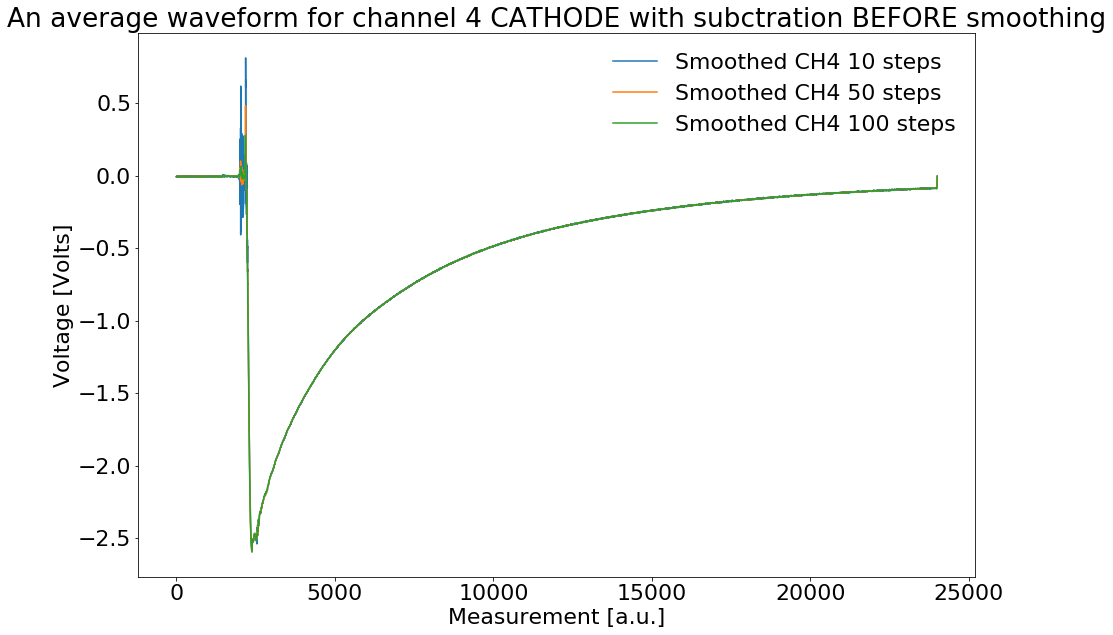

In [32]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,ave_clean_ch4_post_smooth,label="Smoothed CH4 10 steps")
ax.plot(smoothed_ch4_same_plot_50,ave_clean_ch4_post_smooth_50,label="Smoothed CH4 50 steps")
ax.plot(smoothed_ch4_same_plot_100,ave_clean_ch4_post_smooth_100,label="Smoothed CH4 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 4 CATHODE with subctration BEFORE smoothing")
ax.legend()

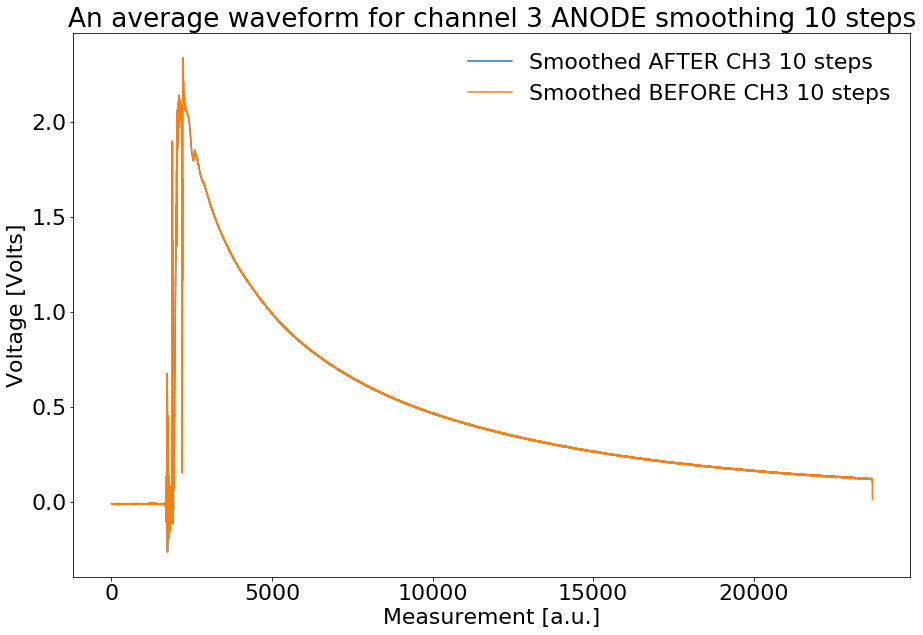

In [33]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,ave_clean_ch3_smooth,label="Smoothed AFTER CH3 10 steps")
ax.plot(smoothed_ch3_time,ave_clean_ch3_post_smooth,label="Smoothed BEFORE CH3 10 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE smoothing 10 steps")
ax.legend()

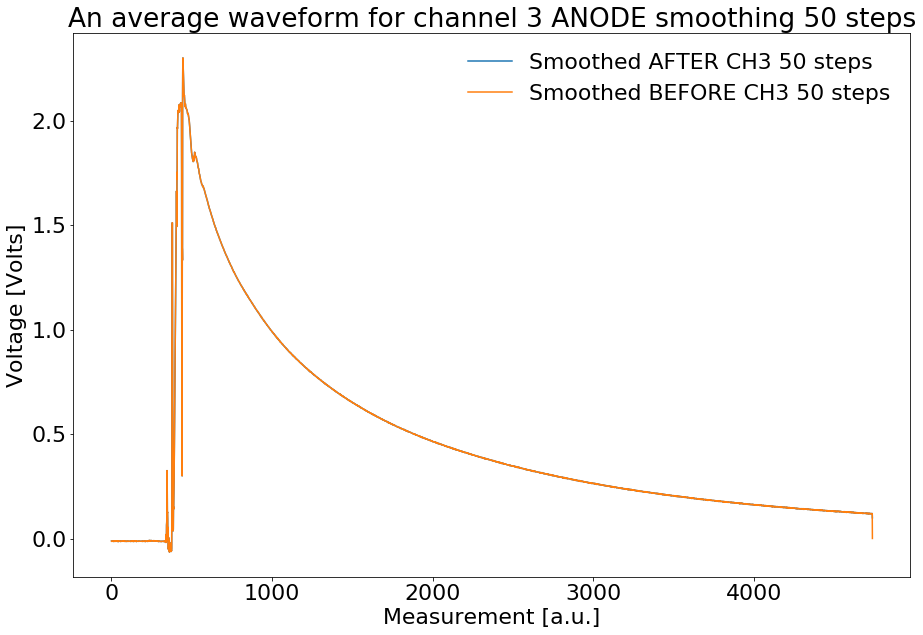

In [34]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time_50,ave_clean_ch3_smooth_50,label="Smoothed AFTER CH3 50 steps")
ax.plot(smoothed_ch3_time_50,ave_clean_ch3_post_smooth_50,label="Smoothed BEFORE CH3 50 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE smoothing 50 steps")
ax.legend()

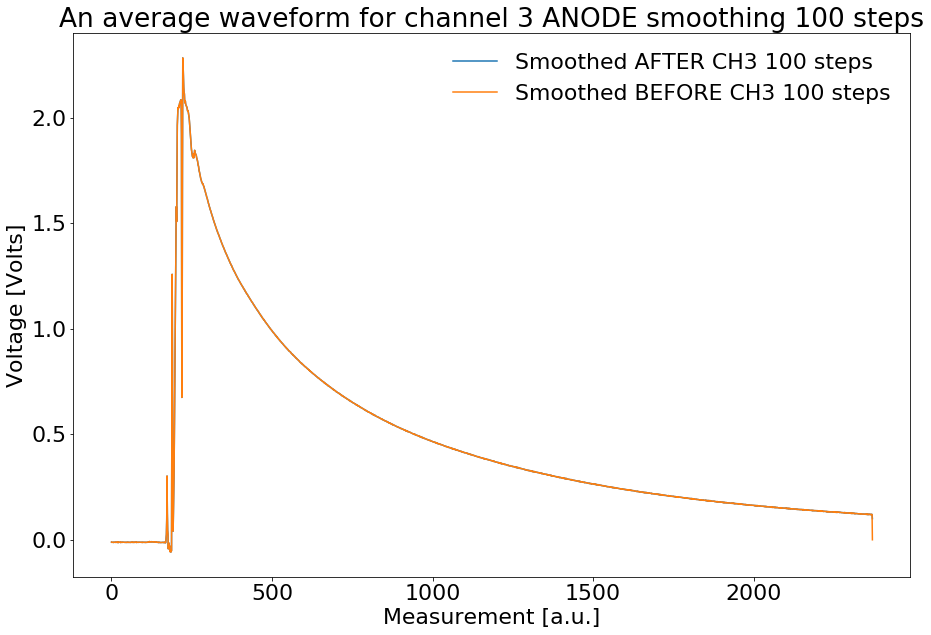

In [35]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time_100,ave_clean_ch3_smooth_100,label="Smoothed AFTER CH3 100 steps")
ax.plot(smoothed_ch3_time_100,ave_clean_ch3_post_smooth_100,label="Smoothed BEFORE CH3 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE smoothing 100 steps")
ax.legend()

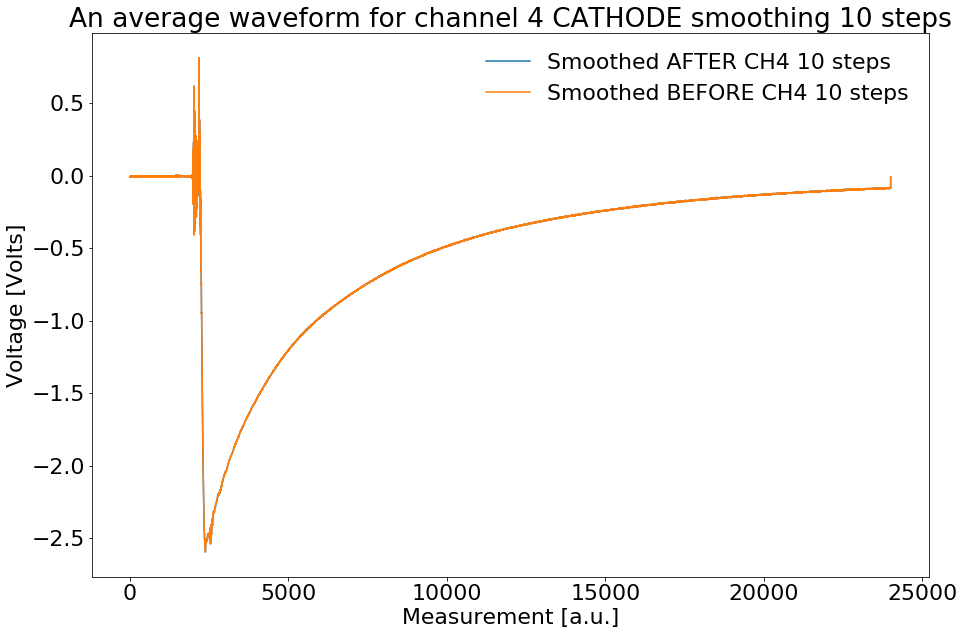

In [36]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,ave_clean_ch4_smooth,label="Smoothed AFTER CH4 10 steps")
ax.plot(smoothed_ch4_time,ave_clean_ch4_post_smooth,label="Smoothed BEFORE CH4 10 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 4 CATHODE smoothing 10 steps")
ax.legend()

In [ ]:
#####

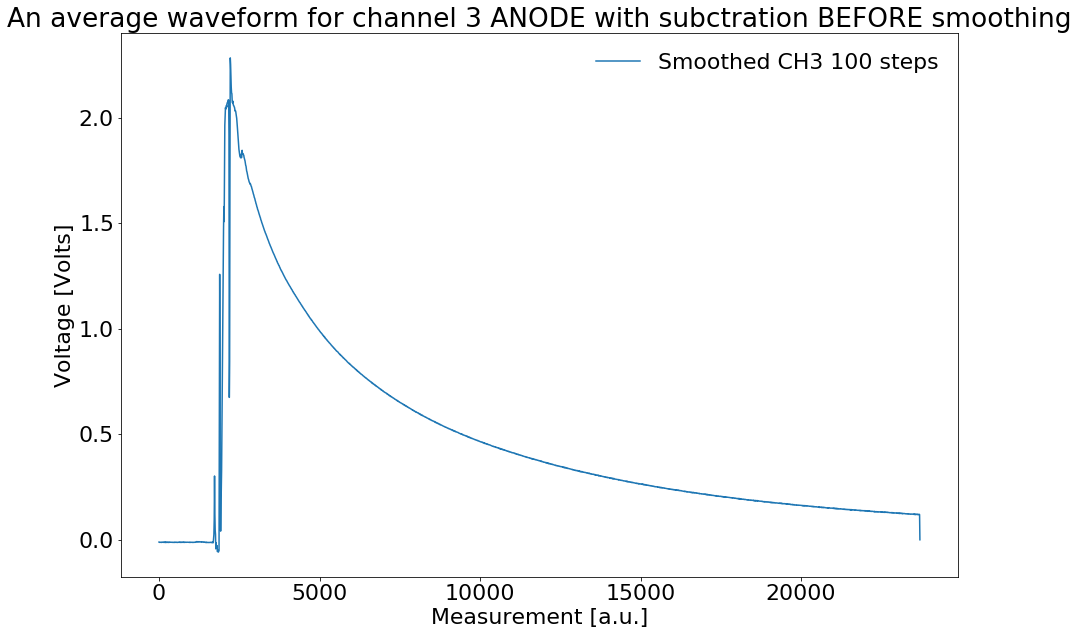

In [37]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_same_plot_100,ave_clean_ch3_post_smooth_100,label="Smoothed CH3 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE with subctration BEFORE smoothing")
ax.legend()

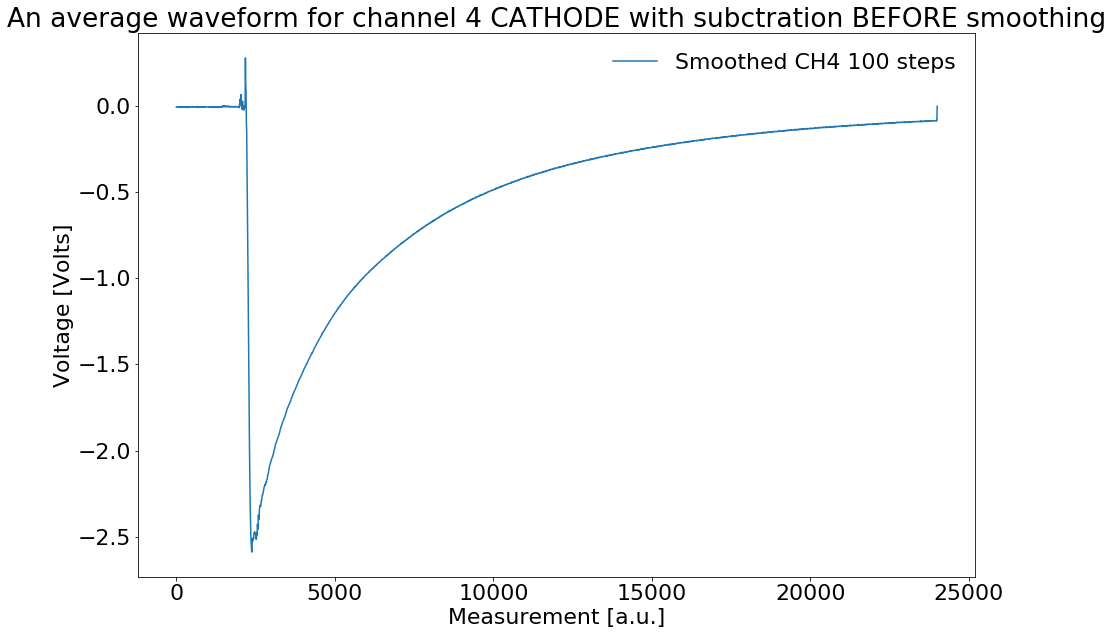

In [38]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_same_plot_100,ave_clean_ch4_post_smooth_100,label="Smoothed CH4 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 4 CATHODE with subctration BEFORE smoothing")
ax.legend()

In [39]:
hf_target = h5.File("results_2023_02_02_14_38_smoothed.hdf5", 'w')
hf_target.create_dataset('filename_ch3_first', data=filename_ch3_first)
hf_target.create_dataset('ave_clean_ch4_smooth_100', data=ave_clean_ch4_smooth_100)
hf_target.create_dataset('smoothed_ch4_same_plot_100', data=smoothed_ch4_same_plot_100)
hf_target.create_dataset('ave_clean_ch3_smooth_100', data=ave_clean_ch3_smooth_100)
hf_target.create_dataset('smoothed_ch3_same_plot_100', data=smoothed_ch3_same_plot_100)
hf_target.close()

In [40]:
hf_target_first=h5.File("results_2023_02_02_19_19_smoothed.hdf5","r")
ch4_time=hf_target_first.get('smoothed_ch4_same_plot_100').value
ch3_time=hf_target_first.get('smoothed_ch3_same_plot_100').value
ch3=hf_target_first.get('ave_clean_ch3_smooth_100').value
ch4=hf_target_first.get('ave_clean_ch4_smooth_100').value

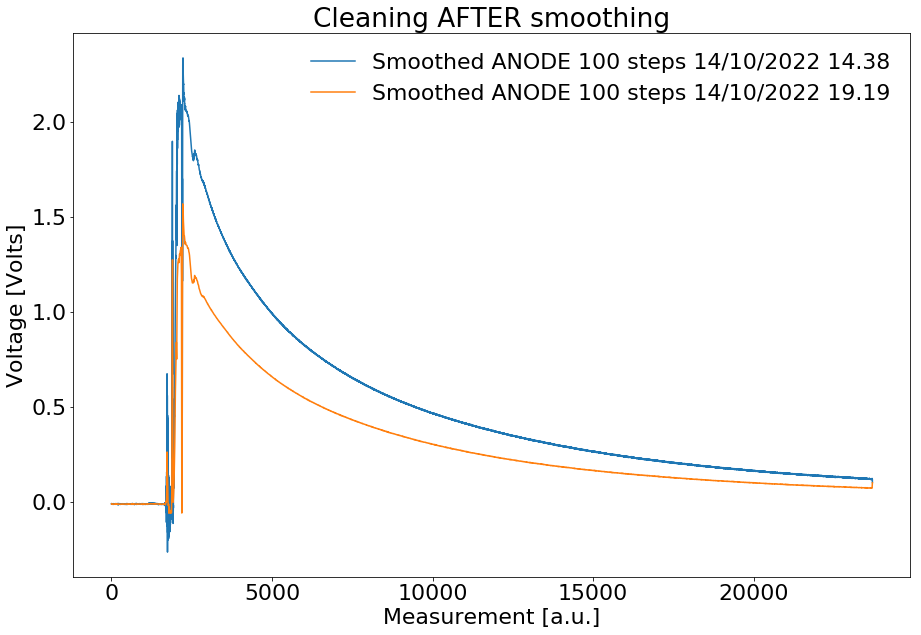

In [41]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,ave_clean_ch3_smooth,label="Smoothed ANODE 100 steps 14/10/2022 14.38")
ax.plot(ch3_time,ch3,label="Smoothed ANODE 100 steps 14/10/2022 19.19")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Cleaning AFTER smoothing")
ax.legend()

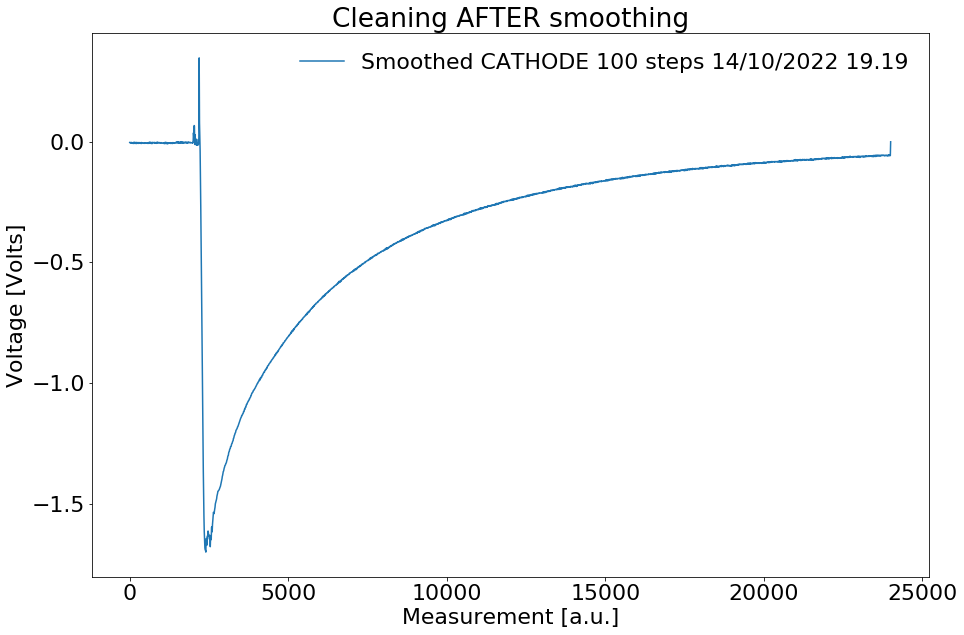

In [65]:
fig, ax = plt.subplots()
ax.plot(ch4_time,ch4,label="Smoothed CATHODE 100 steps 14/10/2022 19.19")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Cleaning AFTER smoothing")
ax.legend()

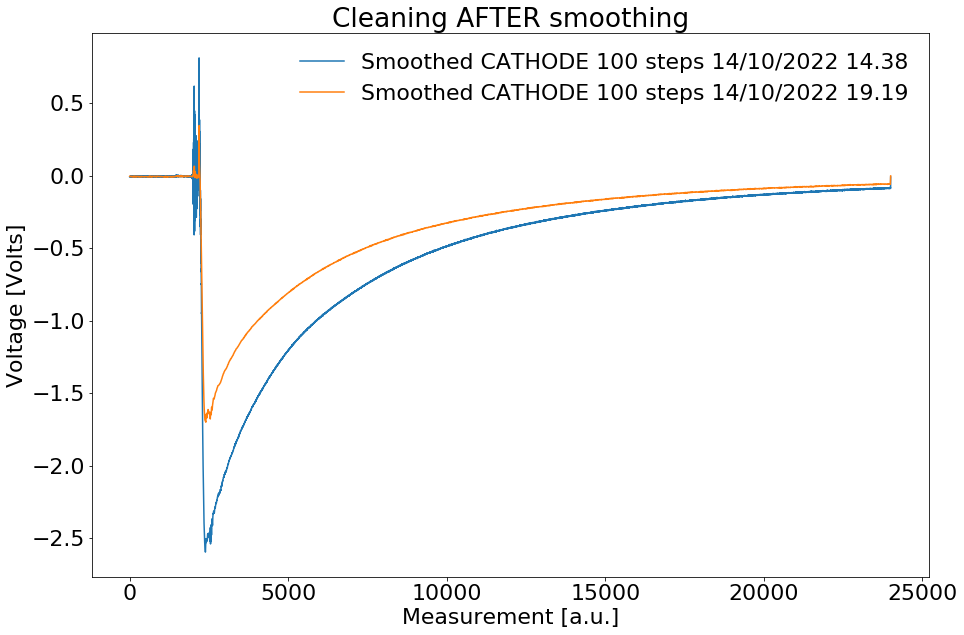

In [61]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,ave_clean_ch4_smooth,label="Smoothed CATHODE 100 steps 14/10/2022 14.38")
ax.plot(ch4_time,ch4,label="Smoothed CATHODE 100 steps 14/10/2022 19.19")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Cleaning AFTER smoothing")
ax.legend()